## Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import WeibullAFTFitter, WeibullFitter

# Load the data
data = pd.read_csv(r"C:\Users\lhumbert\OneDrive - Inside MD Anderson\TTE-ORN-shared_new\final_analysis\tte-orn-raw-PHI_LHV_updated_May2024_AFT_SK.csv")

# Prepare the model data
model_data = data[['orn_status', 'tte', 'dental_ext', 'D25', 'gender']].copy()

pd.set_option('display.max_columns', None) 
#model_data


C:\Users\lhumbert\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
## Frequency and nonparametric plots

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


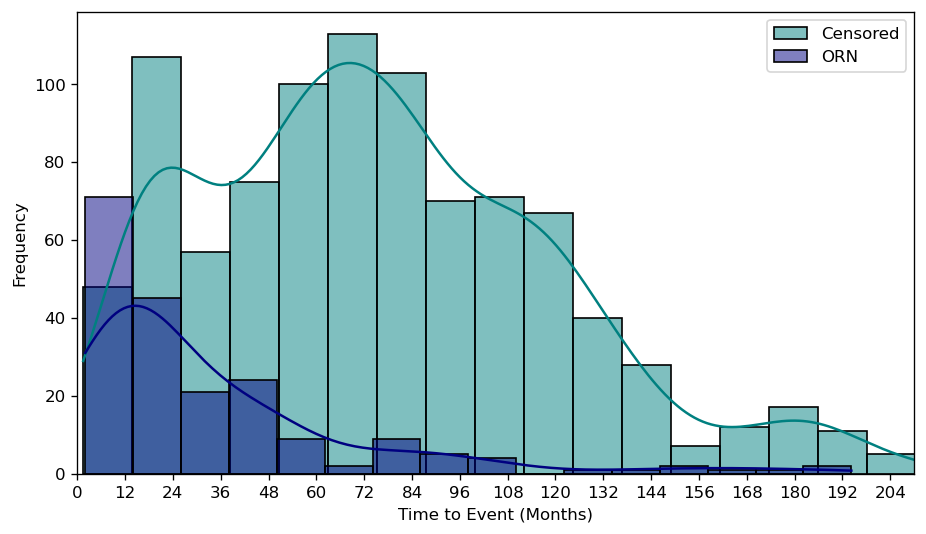

In [3]:

# Distribution of Time to Event (tte) for orn_status=1 and orn_status=0
plt.figure(figsize=(9, 5), dpi=120)  # Setting figure size and resolution

sns.histplot(model_data[model_data['orn_status'] == 0]['tte'], color="teal", label='Censored', kde=True)
sns.histplot(model_data[model_data['orn_status'] == 1]['tte'], color="navy", label='ORN', kde=True)
#plt.title('Distribution of Time to Event (TTE) by ORN Status')
plt.xlabel('Time to Event (Months)')
plt.ylabel('Frequency')
xticks = list(range(0, 240, 12))  # Generate ticks from 0 to 220, stepping by 20
#xticks.append(210)  # Ensure 60 is included
xticks = sorted(set(xticks))  # Remove duplicates and sort
plt.xticks(xticks)  # Apply custom ticks
plt.xlim([0, 210])

plt.legend()
plt.show()

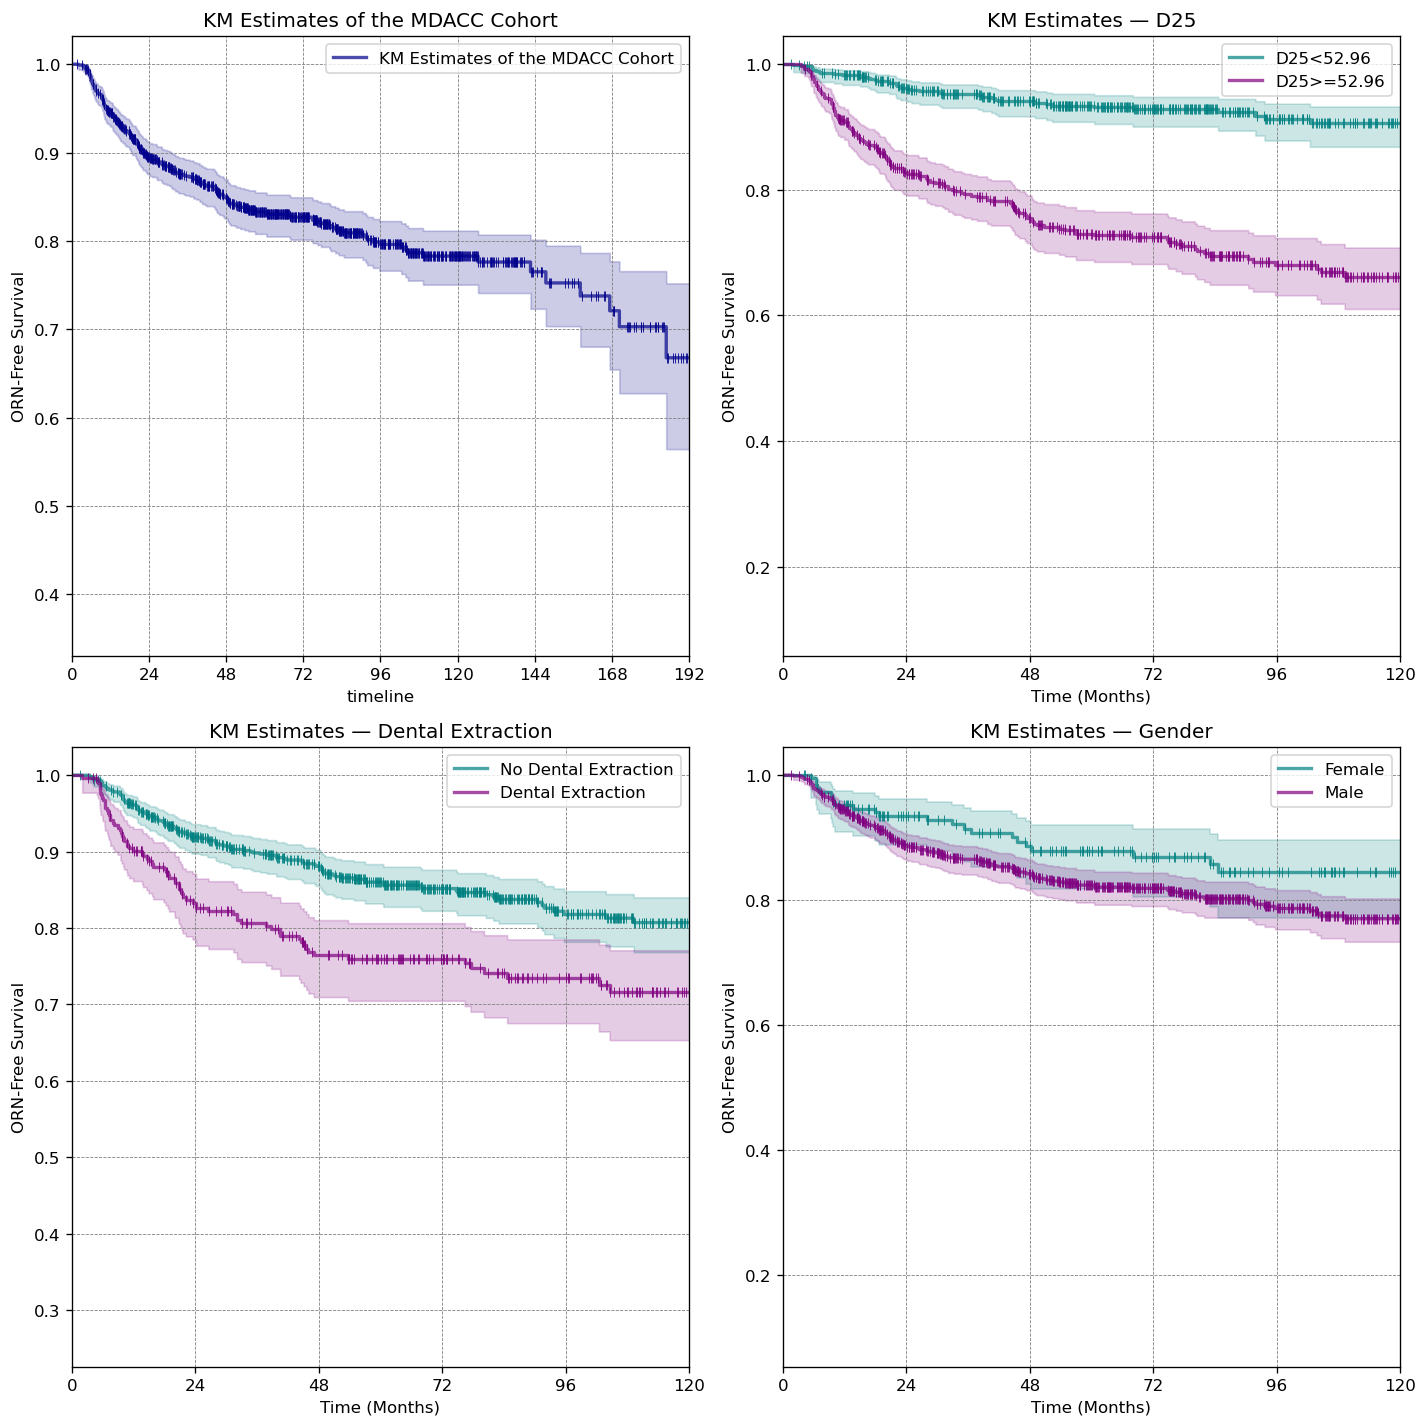

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

def plot_km(ax, data, condition, label, title, colors):
    kmf = KaplanMeierFitter()
    for i, c in enumerate(condition):
        kmf.fit(data.loc[c, 'tte'], data.loc[c, 'orn_status'], label=f'{label[i]}')
        kmf.plot(ax=ax, ci_show=True, alpha=0.7, ci_alpha=0.2, linewidth=2, linestyle='-', color=colors[i], show_censors=True, censor_styles={'marker': '|', 'ms': 6, 'mew': 0.5})
    ax.set_title(title)
    ax.set_xlabel('Time (Months)')
    ax.set_ylabel('ORN-Free Survival')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')
    ax.set_xlim([0, 120])  # Set xlim after plotting


data_kmf = model_data

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), dpi=120)
xticks = list(range(0, 214, 24))
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim([0, 120])
    ax.set_xticks(xticks)
    ax.set_xlabel('Time (Months)')
    ax.set_ylabel('ORN-Free Survival')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')

# Plot for entire MDACC cohort
kmf_mdacc = KaplanMeierFitter()
kmf_mdacc.fit(data_kmf['tte'], data_kmf['orn_status'], label='KM Estimates of the MDACC Cohort')
kmf_mdacc.plot(ax=ax1, ci_show=True, alpha=0.7, ci_alpha=0.2, linewidth=2, linestyle='-', c='darkblue', show_censors=True, censor_styles={'marker': '|', 'ms': 6, 'mew': 0.5})
ax1.set_title('KM Estimates of the MDACC Cohort')
ax1.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')

# Define colors for D25 plot
D25_colors = ['teal', 'purple']

# Define colors for dental extraction plot
dental_colors = ['teal', 'purple']

# Define colors for Gender plot
smoking_colors = ['teal', 'purple']

plot_km(ax2, data_kmf, [data_kmf['D25'] < data_kmf['D25'].median(), data_kmf['D25'] >= data_kmf['D25'].median()],  [f"D25<{data_kmf['D25'].median()}", f"D25>={data_kmf['D25'].median()}"], 'KM Estimates — D25', D25_colors)
plot_km(ax3, data_kmf, [data_kmf['dental_ext'] == 0, data_kmf['dental_ext'] == 1], ['No Dental Extraction', 'Dental Extraction'], 'KM Estimates — Dental Extraction', dental_colors)
plot_km(ax4, data_kmf, [data_kmf['gender'] == 0, data_kmf['gender'] == 1], ['Female', 'Male'], 'KM Estimates — Gender', smoking_colors)

plt.tight_layout()
plt.show()


## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets with stratification on 'orn_status'
train_data, test_data = train_test_split(model_data, test_size=0.2, random_state=42, stratify=model_data['orn_status'])


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


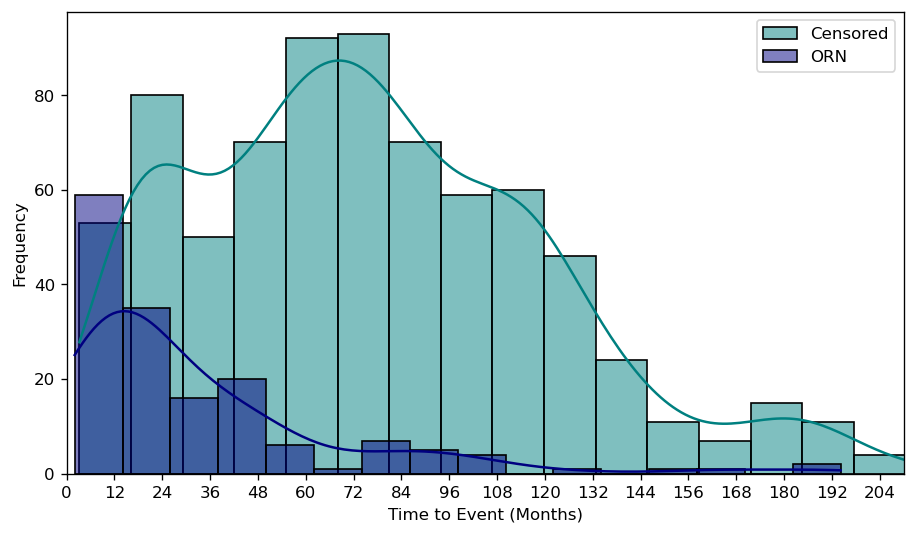

In [40]:

# Distribution of Time to Event (tte) for orn_status=1 and orn_status=0
plt.figure(figsize=(9, 5), dpi=120)  # Setting figure size and resolution

sns.histplot(train_data[train_data['orn_status'] == 0]['tte'], color="teal", label='Censored', kde=True)
sns.histplot(train_data[train_data['orn_status'] == 1]['tte'], color="navy", label='ORN', kde=True)
#plt.title('Distribution of Time to Event (TTE) by ORN Status')
plt.xlabel('Time to Event (Months)')
plt.ylabel('Frequency')
xticks = list(range(0, 240, 12))  # Generate ticks from 0 to 220, stepping by 20
#xticks.append(210)  # Ensure 60 is included
xticks = sorted(set(xticks))  # Remove duplicates and sort
plt.xticks(xticks)  # Apply custom ticks
plt.xlim([0, 210])

plt.legend()
plt.show()

## AFT Model


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter
import numpy as np

# Fit the Weibull AFT model only on the training data
aft = WeibullAFTFitter()
aft.fit(train_data, duration_col='tte', event_col='orn_status')


aft.print_summary()


<lifelines.WeibullAFTFitter: fitted with 903 total observations, 745 right-censored observations>
             duration col = 'tte'
                event col = 'orn_status'
   number of observations = 903
number of events observed = 158
           log-likelihood = -1029.82
         time fit was run = 2024-07-01 20:04:22 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                   
lambda_ D25        -0.12      0.88      0.01           -0.15           -0.10                0.86                0.91
        dental_ext -0.31      0.73      0.21           -0.71            0.10                0.49                1.10
        gender     -0.48      0.62      0.31           -1.08            0.11                0.34                1.12
        Intercept  13.69  8.85e+05      0.98           11.77           15.62            1.29e+05            6.08e+06
rho_    Intercept  -0.21      0.81      0.07           -0.35           -0.08                0.71                0.93

                    cmp to     z      p  -log2(p)
param   covariate                                
lambda_ D25           0.00 -8.45 <0.005     54.96
        dental_ext    0.00 -1.50   0.13      2.89
        gender        0.00 -1.58   0.11      3.14
        Intercept     0.00 13.92 <0.005    143.96
rho_    Intercept     0.00 -3.06 <0.005      8.84
---
Concordance = 0.74
AIC = 2069.64
log-likelihood ratio test = 125.68 on 3 df
-log2(p) of ll-ratio test = 87.49

                    95% lower-bound  95% upper-bound
param   covariate                                   
lambda_ D25               -0.152829        -0.095294
        dental_ext        -0.714193         0.095873
        gender            -1.082956         0.114926
        Intercept         11.765577        15.620832
rho_    Intercept         -0.347198        -0.076329


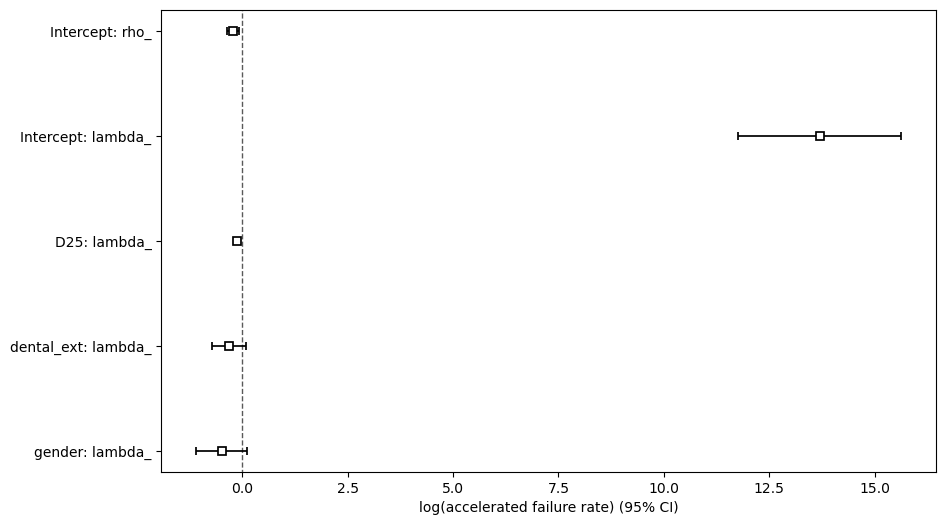

In [34]:
# Forest plot

# Extract the confidence intervals
confidence_intervals = aft.confidence_intervals_
print(confidence_intervals)

# Create a forest plot
plt.figure(figsize=(10, 6))
aft.plot()
#plt.title('Weibull AFT Model Parameters')
plt.show()

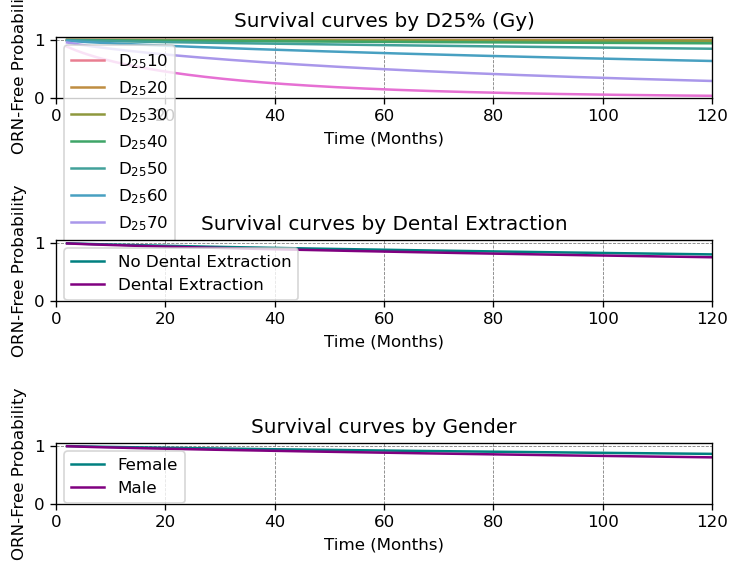

In [44]:
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim([0, 120])
    ax.set_xticks(xticks)
    ax.set_xlabel('Time (Months)')
    ax.set_ylabel('ORN-Free Survival')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='grey')

def plot_survival_curves(ax, aft, feature, values, labels, title, color_palette=None, cmap=None):
    if color_palette is None:
        color_palette = sns.color_palette('husl', len(values))
    for value, label, color in zip(values, labels, color_palette):
        aft.plot_partial_effects_on_outcome(feature, [value], ax=ax, plot_baseline=False, color=color)
    ax.set_title(title)
    ax.set_xlabel('Time (Months)')
    ax.set_ylabel('ORN-Free Probability')
    ax.set_xlim([0, 120])  # Adjust the x-axis limit as needed
    ax.set_ylim([0, 1.05])  # Optionally adjust the y-axis limit if needed
    ax.legend(labels=labels)  # Assigning labels to the legend
    ax.grid(True, linestyle='--', linewidth=0.5, color='grey')


# Define the original color palette
colors_D25 = sns.color_palette('husl', 8, 0.8)
colors=[ 'teal','purple']

# Create a 1x3 grid of subplots
#fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16, 5), dpi=120)
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1, 1, 1]}, dpi=120)

# Plot survival curves for different features with the original color palette
plot_survival_curves(ax3, aft, 'gender', [0, 1],['Female', 'Male'], 'Survival curves by Gender', color_palette=colors)
plot_survival_curves(ax1, aft, 'D25', [10, 20, 30, 40, 50, 60, 70, 80],["D$_{25}$10", 'D$_{25}$20', 'D$_{25}$30', 'D$_{25}$40', 'D$_{25}$50', 'D$_{25}$60', 'D$_{25}$70', 'D$_{25}$80'], 'Survival curves by D25% (Gy)', color_palette=colors_D25)
plot_survival_curves(ax2, aft, 'dental_ext', [0, 1], ['No Dental Extraction', 'Dental Extraction'],'Survival curves by Dental Extraction', color_palette=colors)

plt.tight_layout()
plt.show()




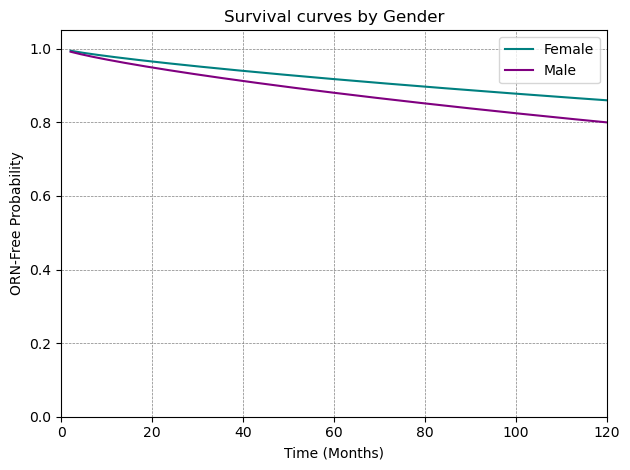

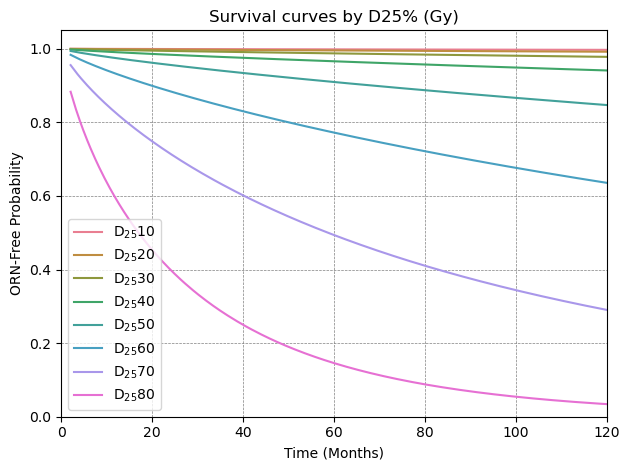

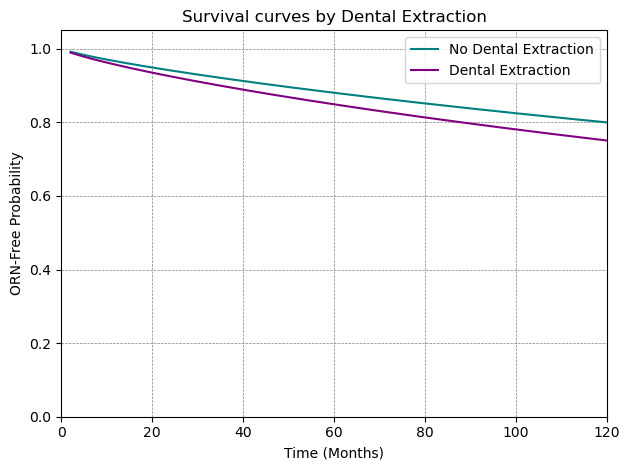

In [46]:
# First plot
plt.figure()
ax1 = plt.gca()
plot_survival_curves(ax1, aft, 'gender', [0, 1], ['Female', 'Male'], 'Survival curves by Gender', color_palette=colors)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adjust space between plots

# Second plot
plt.figure()
ax2 = plt.gca()
plot_survival_curves(ax2, aft, 'D25', [10, 20, 30, 40, 50, 60, 70, 80], ["D$_{25}$10", 'D$_{25}$20', 'D$_{25}$30', 'D$_{25}$40', 'D$_{25}$50', 'D$_{25}$60', 'D$_{25}$70', 'D$_{25}$80'], 'Survival curves by D25% (Gy)', color_palette=colors_D25)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adjust space between plots

# Third plot
plt.figure()
ax3 = plt.gca()
plot_survival_curves(ax3, aft, 'dental_ext', [0, 1], ['No Dental Extraction', 'Dental Extraction'], 'Survival curves by Dental Extraction', color_palette=colors)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Adjust space between plots

plt.show()

In [8]:
# Print AIC and BIC values
print(f"AIC: {aft.AIC_}")
print(f"BIC: {aft.BIC_}")

AIC: 2069.637411384513
BIC: 2073.248856491347


## C-Index across different prediction horizons


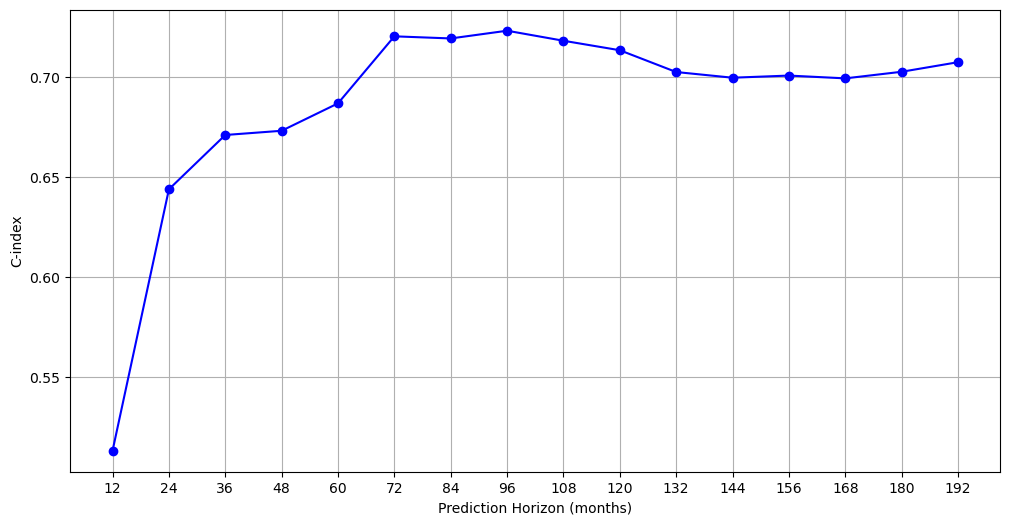

NameError: name 'KFold' is not defined

In [25]:

from lifelines.utils import k_fold_cross_validation, concordance_index

# Define the prediction horizons (in months)
prediction_horizons = np.arange(12, 197, 12)

# 1. C-index for test_data
c_indices_test = []

for horizon in prediction_horizons:
    test_data_horizon = test_data[test_data['tte'] <= horizon].copy()
    predicted_survival_times = aft.predict_percentile(test_data_horizon, p=0.5)
    c_index = concordance_index(test_data_horizon['tte'], predicted_survival_times, test_data_horizon['orn_status'])
    c_indices_test.append(c_index)

# Plot C-index for test_data
plt.figure(figsize=(12, 6))
plt.plot(prediction_horizons, c_indices_test, marker='o', color='blue', label='Test Data')
plt.xlabel('Prediction Horizon (months)')
plt.ylabel('C-index')
#plt.title('Harrells C-index over Different Prediction Horizons on Held Out Dataset')
plt.xticks(prediction_horizons)  # Set x-ticks to be the specified intervals
#plt.legend()
plt.grid(True)
plt.show()


# 2. C-index using 5-fold cross-validation on the full dataset
kf = KFold(n_splits=5, shuffle=True, random_state=1)
c_indices_folds = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(train_data):
    train_fold = train_data.iloc[train_index]
    val_fold = train_data.iloc[val_index]
    
    aft_fold = WeibullAFTFitter()
    aft_fold.fit(train_fold, duration_col='tte', event_col='orn_status')
    
    fold_c_indices = []
    for horizon in prediction_horizons:
        val_fold_horizon = val_fold[val_fold['tte'] <= horizon].copy()
        predicted_survival_times = aft_fold.predict_percentile(val_fold_horizon, p=0.5)
        c_index = concordance_index(val_fold_horizon['tte'], predicted_survival_times, val_fold_horizon['orn_status'])
        fold_c_indices.append(c_index)
    c_indices_folds.append(fold_c_indices)

c_indices_folds = np.array(c_indices_folds)
mean_c_indices = c_indices_folds.mean(axis=0)

# Plot C-index for each fold and the mean
plt.figure(figsize=(12, 6))
for fold_c_indices in c_indices_folds:
    plt.plot(prediction_horizons, fold_c_indices, linestyle='--', color='gray', alpha=0.7)
plt.plot(prediction_horizons, mean_c_indices, marker='o', color='b', label='Mean C-index')
plt.xlabel('Prediction Horizon (months)')
plt.ylabel('C-index')
plt.title('C-index over Different Prediction Horizons using 5-Fold CV')
plt.xticks(prediction_horizons)  # Set x-ticks to be the specified intervals
plt.legend()
plt.grid(True)
plt.show()

## Evaluation
We will use the SurvivalEVAL to evaluate the model.
Individual Survival Distribution (ISD) models a patient's personalized survival probability at all future time points. 

In [10]:
from SurvivalEVAL.Evaluator import LifelinesEvaluator

In [11]:
isd_curves  = aft.fit(train_data, duration_col="tte", event_col="orn_status").predict_survival_function(test_data)
isd_curves.tail() #The index of the dataframe is the time points, and the columns are the sample IDs


,707,570,67,900,766,165,847,805,44,856,546,869,823,115,709,343,722,1001,743,952,371,1124,653,358,576,488,1014,1020,503,906,88,820,991,800,925,432,851,181,78,770,287,1034,466,15,288,95,123,661,1015,350,835,490,954,1005,130,374,23,1067,1102,1003,955,640,459,1008,710,248,380,1012,1029,300,24,198,332,698,326,630,39,591,472,413,902,960,945,257,647,173,510,524,655,194,318,878,122,336,700,684,147,200,575,35,197,266,430,289,919,5,804,1061,708,210,615,972,959,260,947,231,612,596,638,206,976,764,329,299,658,711,1057,597,276,690,492,751,1047,725,422,706,577,383,102,395,16,899,628,119,62,898,924,1107,971,425,201,26,155,870,867,813,474,43,598,980,1051,912,32,554,242,622,760,705,111,386,163,868,1002,473,579,1119,227,247,897,1000,229,891,723,126,607,129,486,871,80,484,259,404,1068,584,461,1063,518,616,592,578,135,882,652,1125,1,998,169,956,967,153,950,73,109,1021,981,964,571,52,550,942,535,241,291,498,845,660
194.23,0.324101,0.626528,0.830235,0.857230,0.805835,0.449646,0.521697,0.991702,0.862933,0.856013,0.992499,0.830492,0.868942,0.474352,0.825367,0.690906,0.633540,0.998344,0.864840,0.790637,0.864588,0.978393,0.679744,0.788058,0.831141,0.676874,0.536927,0.921403,0.919333,0.934348,0.628834,0.910006,0.148872,0.766846,0.909833,0.661951,0.223155,0.477474,0.535586,0.551532,0.900150,0.806498,0.816234,0.998377,0.751738,0.377837,0.869797,0.568756,0.782139,0.416477,0.657322,0.503196,0.795290,0.783102,0.791233,0.549572,0.947360,0.906942,0.626781,0.879097,0.815401,0.823427,0.877856,0.805975,0.593138,0.447047,0.749390,0.811353,0.936532,0.998192,0.713137,0.737894,0.522058,0.843234,0.887366,0.633736,0.921251,0.568756,0.280927,0.351328,0.865218,0.355018,0.458571,0.899864,0.437390,0.998229,0.465375,0.638067,0.659807,0.253607,0.833769,0.165507,0.555822,0.818056,0.736961,0.758550,0.493091,0.798703,0.420554,0.558557,0.997755,0.626722,0.235357,0.923052,0.881016,0.494091,0.873285,0.899660,0.609167,0.396116,0.970393,0.926663,0.957898,0.685745,0.816400,0.062820,0.462943,0.449285,0.570429,0.638124,0.482143,0.769692,0.581276,0.632046,0.215141,0.727570,0.731725,0.699747,0.532222,0.541321,0.477545,0.880567,0.873523,0.775257,0.760856,0.839263,0.480023,0.565268,0.689122,0.598247,0.764831,0.855746,0.461152,0.679165,0.991145,0.412519,0.304385,0.395907,0.756862,0.532876,0.585694,0.632959,0.511786,0.976978,0.636724,0.998328,0.647816,0.599081,0.854267,0.805835,0.758159,0.686279,0.521309,0.207885,0.915589,0.071554,0.610923,0.859049,0.263154,0.402531,0.165448,0.729423,0.618191,0.638452,0.785968,0.877955,0.362697,0.452890,0.929263,0.930552,0.994673,0.721476,0.998341,0.547588,0.605519,0.950064,0.968205,0.860620,0.846210,0.664412,0.650615,0.779216,0.901628,0.516915,0.387431,0.826138,0.834809,0.808266,0.280261,0.299232,0.621999,0.710382,0.547568,0.878755,0.558048,0.795681,0.494441,0.621761,0.922306,0.573573,0.833899,0.895368,0.738942,0.889566,0.173662,0.625898,0.462156,0.848372,0.353837,0.576830,0.708274,0.838701,0.515222,0.936787,0.911713,0.470796
197.80,0.318725,0.622194,0.827945,0.855272,0.803256,0.444342,0.516682,0.991579,0.861047,0.854040,0.992388,0.828205,0.867131,0.469129,0.823019,0.687124,0.629262,0.998320,0.862978,0.787884,0.862722,0.978076,0.675860,0.785276,0.828862,0.672964,0.531993,0.920284,0.918186,0.933407,0.624518,0.908732,0.144722,0.763829,0.908558,0.657909,0.218241,0.472263,0.530644,0.546680,0.898745,0.803927,0.813777,0.998353,0.748560,0.372417,0.867998,0.564011,0.779291,0.411096,0.653240,0.498091,0.792590,0.780264,0.788487,0.544709,0.946600,0.905628,0.622448,0.877417,0.812934,0.821055,0.876160,0.803398,0.588556,0.441735,0.746187,0.808839,0.935621,0.998165,0.709566,0.734572,0.517044,0.841102,0.885793,0.629459,0.920130,0.564011,0.275681,0.345914,0.863360,0.349601,0.453293,0.898456,0.432053,0.998203,0.460120,0.633824,0.655747,0.248494,0.831521,0.161146,0.550997,0.815621,0.733629,0.755444,0.487941,0.796042,0.415180,0.553749,0.997722,0.622390,0.230356,0.921955,0.879360,0.488946,0.871530,0.898249,0.604700,0.390708,0.969960,0.925616,0.957287,0.681915,0.813945,0.060291,

In [ ]:
## LifelinesEvaluator class takes the ISD curves, the time and censoring status of the test data, and the time and censoring status of the training data as inputs.

In [13]:
#from Evaluator import LifelinesEvaluator

# Initialize the evaluator 
evl  = LifelinesEvaluator(isd_curves , test_data.tte, test_data.orn_status, train_data.tte, train_data.orn_status)

# Concordance index
cindex , correct_pairs , total_pairs  = evl.concordance()
print(" Model - C-index: {:.3f}; \nNumber of correctly ordered pairs: {}; \nNumber of total comparable pairs: {}.".format(cindex , correct_pairs , total_pairs ))

# MAE 
mae  = evl .mae(method="Hinge", weighted=False, log_scale=True)
print(" Model - Mean Log Absolute Error : {:.3f}.".format(mae ))
mse = evl.mse(method="Hinge", weighted=False, log_scale=True)
print("Mean Logarithmic Squared Error (MLSE) -Hinge: {:.3f}.".format(mse))

 Model - C-index: 0.711; 
Number of correctly ordered pairs: 4606.0; 
Number of total comparable pairs: 6481.0.
 Model - Mean Log Absolute Error : 0.415.
Mean Logarithmic Squared Error (MLSE) -Hinge: 1.172.


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Time', ylabel='Survival probability'>)

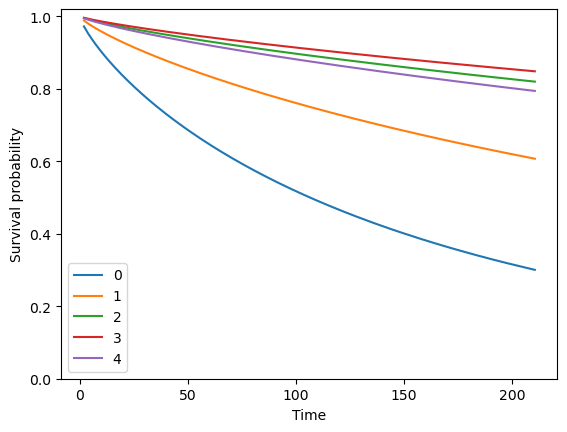

In [14]:
evl.plot_survival_curves(curve_indices=[0, 1, 2, 3, 4])


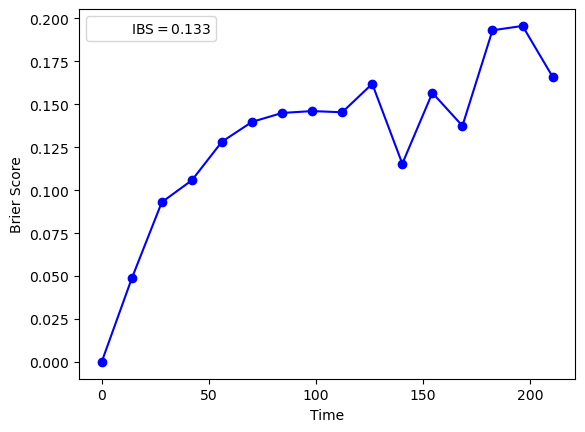

The model is d-calibrated!
0.9978684930445982


In [23]:
#D-calibration

ibs  = evl.integrated_brier_score(num_points=16, draw_figure=True)
p_value, bin_hist  = evl.d_calibration(num_bins=10)


if p_value >= 0.05:
    print("The model is d-calibrated!")
else:
    print("The model is not d-calibrated!")


print(p_value)

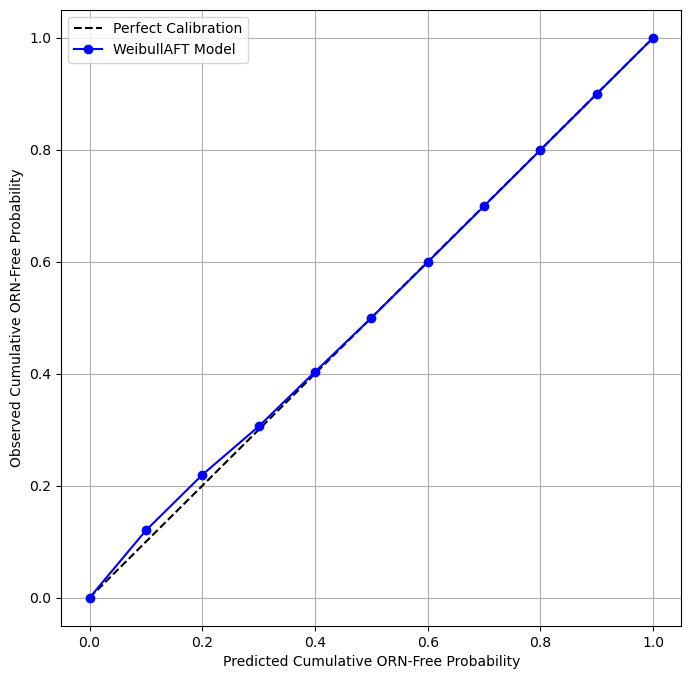

In [36]:
# Distribution Calibration (D-calibration)

# Normalize the histograms
bin_hist  /= bin_hist .sum()

default = np.linspace(0, 1, 11)
plt.figure(figsize=(8, 8))  # Square figure

plt.plot(default, default, linestyle='dashed', label="Perfect Calibration", color='black')

# Calculate the cumulative fractions for plotting
fraction = np.concatenate((np.array([0]), bin_hist))
plt.plot(default, fraction.cumsum(), 'o-', label="WeibullAFT Model", color='blue')
plt.xlabel("Predicted Cumulative ORN-Free Probability")
plt.ylabel("Observed Cumulative ORN-Free Probability")
plt.legend()
plt.grid(True)

plt.show()



In [38]:
# One-time Calibration - output: p-value of Hosmer-Lemeshow goodness-of-fit test at a target time

target_t = 72
auc = evl.auc(target_t)
bs = evl.brier_score(target_t)
p, ob, exp = evl.one_calibration(target_t)

print(p)

print("AUC: {:.4f}; \nBS: {:.4f}.".format(auc, bs))
if p >= 0.05:
    print("The model is 1-calibrated!")
else:
    print("The model is not 1-calibrated!")

0.18145771436430647
AUC: 0.6871; 
BS: 0.1401.
The model is 1-calibrated!


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Reverse the lists if needed
ob.reverse()
exp.reverse()

# Define bins
bins = np.arange(10)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot observed and expected values
plt.bar(bins - 0.15, ob, width=0.3, label="Observed", color='teal', edgecolor='black')
plt.bar(bins + 0.15, exp, width=0.3, label="Expected", color='purple', edgecolor='black')

# Set labels and title
plt.xlabel('Bin', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.title('Observed vs Expected Survival Probability', fontsize=14)

# Add text for p-value in the upper left corner
plt.text(0.05, 0.95, r'$p-value = {:.3f}$'.format(p_value), verticalalignment='top', horizontalalignment='left',
         fontsize=12, color='black', transform=plt.gca().transAxes)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True,  linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'ob' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define target times from 12 to 196 at intervals of 12
target_times = np.arange(12, 197, 12)

# Lists to store metric values
auc_values = []
brier_scores = []
calibration_status = []

# Iterate over target times
for target_t in target_times:
    target_time = int(target_t)  # Convert to regular Python integer
    auc = evl.auc(target_time)
    bs = evl.brier_score(target_time)
    p, ob, exp = evl.one_calibration(target_time)
    
    auc_values.append(auc)
    brier_scores.append(bs)
    calibration_status.append(p >= 0.05)


# Plot AUC values
plt.figure(figsize=(10, 6))
plt.plot(target_times, auc_values, marker='o', label='AUC')
plt.xlabel('Target Time')
plt.ylabel('AUC')
plt.title('AUC over Different Target Times')
plt.xticks(target_times)
plt.ylim(0, 1.1)

plt.grid(True)
plt.legend()
plt.show()

# Plot Brier scores
plt.figure(figsize=(10, 6))
plt.plot(target_times, brier_scores, marker='o', color='r', label='Brier Score')
plt.xlabel('Target Time')
plt.ylabel('Brier Score')
plt.ylim(0, 1.1)

plt.title('Brier Score over Different Target Times')
plt.xticks(target_times)
plt.grid(True)
plt.legend()
plt.show()

# Plot calibration status as dots
plt.figure(figsize=(10, 6))
for i, status in enumerate(calibration_status):
    color = 'g' if status else 'r'
    plt.scatter(target_times[i], 1 if status else 0, color=color)

plt.xlabel('Target Time')
plt.ylabel('1-Calibrated')
plt.title('1-Calibrated Status over Different Target Times')
plt.xticks(target_times)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 1], ['Not 1-Calibrated', '1-Calibrated'])
plt.grid(True)
plt.show()

In [30]:
from lifelines.calibration import survival_probability_calibration

t0 = 72

# Create a plot to visualize the calibration

# Use the survival_probability_calibration function
survival_probability_calibration(model=aft, df=train_data, t0=t0, ax=ax)


ICI =  0.17753455796572543
E50 =  0.1399112543822575


(<Axes: title={'center': 'Smoothed calibration curve of \npredicted vs observed probabilities of t ≤ 72 mortality'}, xlabel='Predicted probability of \nt ≤ 72 mortality', ylabel='Observed probability of \nt ≤ 72 mortality'>,
 0.17753455796572543,
 0.1399112543822575)

<Figure size 640x480 with 0 Axes>

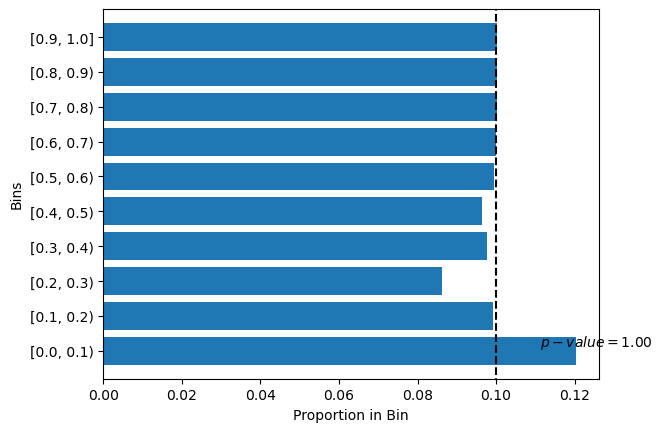

In [28]:

bars = ('[0.0, 0.1)', '[0.1, 0.2)', '[0.2, 0.3)', '[0.3, 0.4)', '[0.4, 0.5)',
        '[0.5, 0.6)', '[0.6, 0.7)', '[0.7, 0.8)', '[0.8, 0.9)', '[0.9, 1.0]')
y_pos = np.arange(len(bars))

fig, ax = plt.subplots()
ax.barh(y_pos, bin_hist)
ax.plot(np.ones(len(bars)+2) * 0.1, np.arange(-1, len(bars)+1),  '--', color="black")
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Proportion in Bin')
ax.set_ylabel('Bins')
ax.text(0.14, 0.5, r'$p-value = {:.2f}$'.format(p_value), verticalalignment='top', horizontalalignment='right', fontsize=10, color='Black')
plt.ylim([-0.8, 9.8])
plt.yticks(y_pos, bars)
plt.show()

## Calibration for cross validation 
Here, we combine the predicted survival curves from all cross-validation folds, and perform the calibration test on the total curves to obtain a single p-value

### Perform 5-fold cross validation on the whole dataset.
use a custom function to ensure each fold has a similar distribution of times and censorships. The predicted survival curves are iteratively concatenated across folds, along with the event indicators and times from the test sets.

In [29]:
from tqdm import tqdm
from Evaluator import LifelinesEvaluator
from Evaluations.util import stratified_folds_survival

total_surv = pd.DataFrame()

total_durations = np.empty([0, ])

total_events = np.empty([0, ])



for data_train, data_test in tqdm(stratified_folds_survival(model_data, model_data.tte.values, model_data.orn_status.values)):

    durations_test = data_test['tte'].values

    events_test = data_test['orn_status'].values.astype('bool')

    # Fit the model

    aft_cv = WeibullAFTFitter()

    aft_cv.fit(data_train, duration_col='tte', event_col='orn_status')

    survival_curves = aft_cv.predict_survival_function(data_test, list(range(1, 53)))

    # Combine the curves

    total_surv = pd.concat([total_surv, survival_curves], axis=1)

    total_durations = np.concatenate([total_durations, durations_test], axis=0)

    total_events = np.concatenate([total_events, events_test], axis=0)

ModuleNotFoundError: No module named 'Evaluator'

In [ ]:
eval = LifelinesEvaluator(total_surv, total_durations, total_events)


### Run one calibration test at 50% time for the whole data set.


In [ ]:
one_cal_times = np.quantile(model_data['tte'], 0.5)

p_value, obs_probs, exp_probs = eval.one_calibration(target_time=one_cal_times, method="DN")
# Returned probability are ranked from high to low. We want to draw the calibration bar plot from low to high.
bins = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

plt.clf()
fig, ax = plt.subplots()

bar1 = ax.bar([x - 0.2 for x in bins], obs_probs, width=0.4, color='r', align='center')
bar2 = ax.bar([x + 0.2 for x in bins], exp_probs, width=0.4, color='g', align='center')

ax.legend((bar1[0], bar2[0]), ('Observed', 'Expected'))
plt.ylabel("Survival Probability")
plt.xlabel("Bin")
plt.show()
if p_value >= 0.05:
    print("The cross validated model is one-calibrated at time {}.".format(one_cal_times))
else:
    print("The cross validated model is not one-calibrated at time {}.".format(one_cal_times))

### Run d-calibration test at 50% time for the whole data set.


In [ ]:
p_value2, bin_statistics = eval.d_calibration()
bins = ["[0, 0.1)", "[0.1, 0.2)", "[0.2, 0.3)", "[0.3, 0.4)", "[0.4, 0.5)", "[0.5, 0.6)", "[0.6, 0.7)", "[0.7, 0.8)",
        "[0.8, 0.9)", "[0.9, 1]"]
plt.clf()
fig, ax = plt.subplots()
ax.bar(bins, bin_statistics)
plt.setp(ax.get_xticklabels(), rotation=30)
plt.ylabel("Counts in bins")
plt.show()
if p_value2 >= 0.05:
    print("The cross validated model is d-calibrated!")
else:
    print("The cross validated model is not d-calibrated!")